In [31]:
# Importing the Libraries
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.io as pio
pio.templates.default = 'plotly_white'

In [3]:
# Loading the Dataset
data = pd.read_csv('cohorts.csv')

In [5]:
# Analyse the Top 5 rows of the Data
data.head(5)

,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000
3,28/10/2023,2293,978,261.079545,167.357143
4,29/10/2023,2678,1082,182.567568,304.350000


In [7]:
# Lets check for any null or missing values
data.isnull().sum()

Date               0
New users          0
Returning users    0
Duration Day 1     0
Duration Day 7     0
dtype: int64

In [9]:
# Lets check for any duplicate values
data.duplicated().sum()

0

In [11]:
# Lets check for the datatypes of all the columns
data.dtypes


Date                object
New users            int64
Returning users      int64
Duration Day 1     float64
Duration Day 7     float64
dtype: object

In [13]:
# Now lest convert the Date column from object to DateTime
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\irt\AppData\Local\Temp\ipykernel_22816\1478940576.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [15]:
# Check Information about the Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             30 non-null     datetime64[ns]
 1   New users        30 non-null     int64         
 2   Returning users  30 non-null     int64         
 3   Duration Day 1   30 non-null     float64       
 4   Duration Day 7   30 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.3 KB


In [17]:
# Now lets have a look at the descriptive statistics of the Dataset
data.describe()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
count,30,30.000000,30.000000,30.000000,30.000000
mean,2023-11-08 12:00:00,3418.166667,1352.866667,208.259594,136.037157
min,2023-10-25 00:00:00,1929.000000,784.000000,59.047619,0.000000
25%,2023-11-01 06:00:00,3069.000000,1131.500000,182.974287,68.488971
50%,2023-11-08 12:00:00,3514.500000,1388.000000,206.356554,146.381667
75%,2023-11-15 18:00:00,3829.500000,1543.750000,230.671046,220.021875
max,2023-11-23 00:00:00,4790.000000,1766.000000,445.872340,304.350000
std,NaN,677.407486,246.793189,64.730830,96.624319


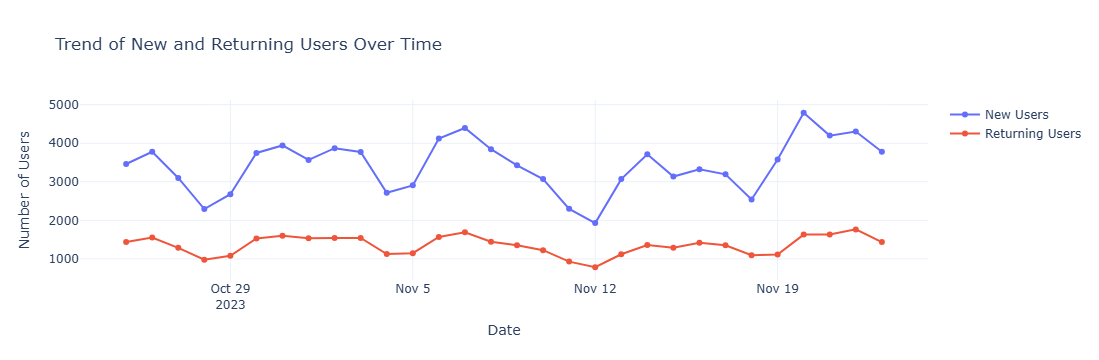

In [27]:
# Now let’s have a look at the trend of the new and returning users over time
fig = go.Figure()

fig.add_trace(go.Scatter(x= data['Date'], y = data['New users'], mode = 'lines+markers', name = 'New Users'))

fig.add_trace(go.Scatter(x = data['Date'], y = data['Returning users'], mode = 'lines+markers', name = 'Returning Users'))

fig.update_layout(title = 'Trend of New and Returning Users Over Time',
                 xaxis_title = 'Date',
                 yaxis_title = 'Number of Users')

fig.show()

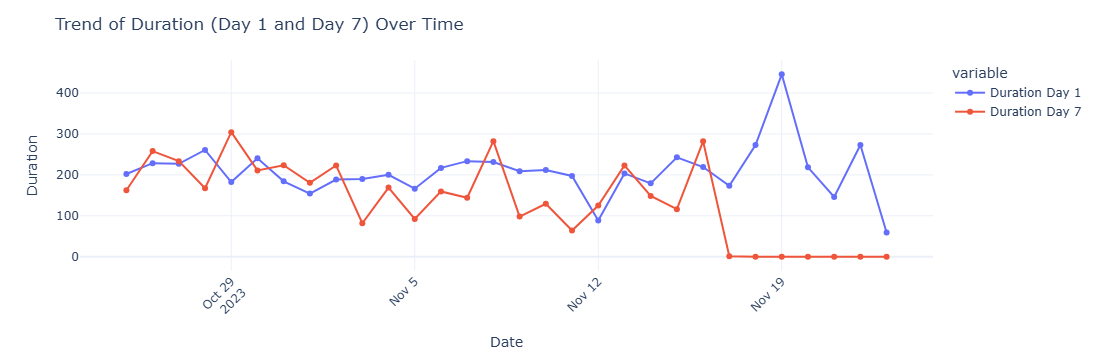

In [29]:
# Now let’s have a look at the trend of duration over time
fig = px.line(data_frame = data, x = 'Date', y = ['Duration Day 1','Duration Day 7'], markers= True, labels = {'value':'Duration'})
fig.update_layout(title = 'Trend of Duration (Day 1 and Day 7) Over Time',
                 xaxis_title = 'Date',
                 yaxis_title = 'Duration',
                 xaxis = dict(tickangle = -45)) 

fig.show()

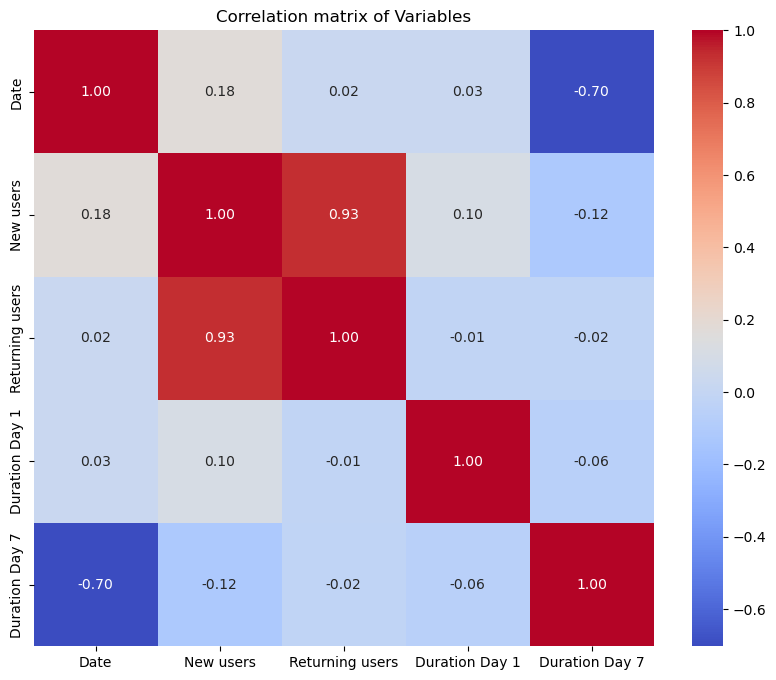

In [33]:
# Now let’s have a look at the correlation between the variables

correlation_matrix = data.corr()


plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation matrix of Variables')
plt.show()

### Now Here’s How to Perform Cohort Analysis

In [39]:
# Grouping data by week
data['Week'] = data['Date'].dt.isocalendar().week

# calculating weekly averages
weekly_averages = data.groupby('Week').agg({
    'New users':'mean',
    'Returning users':'mean',
    'Duration Day 1':'mean',
    'Duration Day 7':'mean'
}).reset_index()

In [41]:
weekly_averages.head()

,Week,New users,Returning users,Duration Day 1,Duration Day 7
0,43,3061.800000,1267.800000,220.324375,225.185602
1,44,3503.571429,1433.142857,189.088881,168.723200
2,45,3297.571429,1285.714286,198.426524,143.246721
3,46,3222.428571,1250.000000,248.123542,110.199609
4,47,4267.750000,1616.250000,174.173330,0.000000


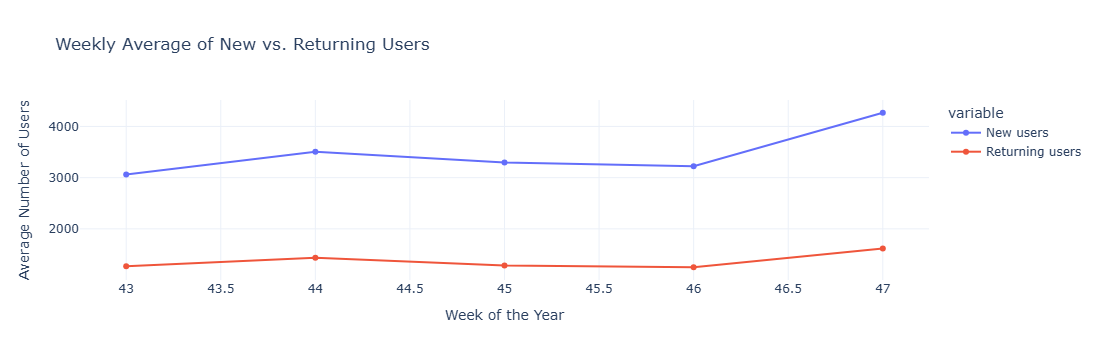

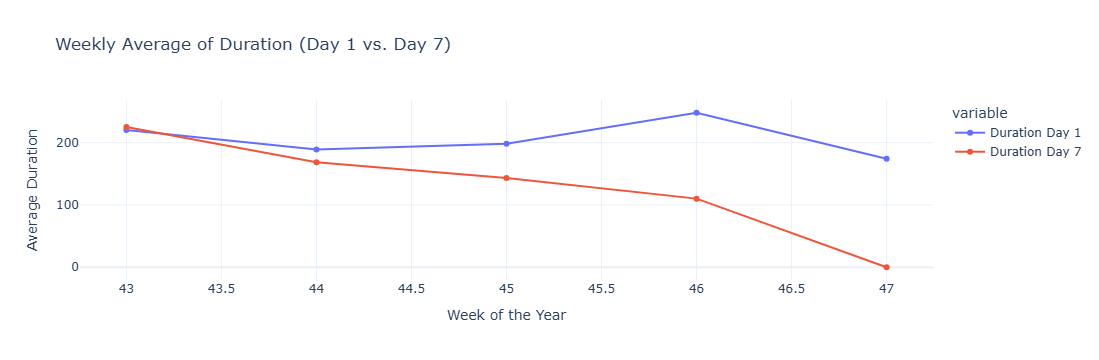

In [43]:
# Now let’s have a look at the weekly average of the new and returning users and the duration:
fig1 = px.line(weekly_averages, x = 'Week', y = ['New users','Returning users'], markers= True,
              labels = {'value': 'Average Number of Users'}, title='Weekly Average of New vs. Returning Users')
fig1.update_xaxes(title='Week of the Year')
fig1.update_yaxes(title='Average Number of Users')

fig2 = px.line(weekly_averages, x = 'Week', y = ['Duration Day 1','Duration Day 7'], markers= True,
              labels = {'value': 'Average Duration'}, title='Weekly Average of Duration (Day 1 vs. Day 7)')
fig2.update_xaxes(title='Week of the Year')
fig2.update_yaxes(title='Average Duration')

fig1.show()
fig2.show()


In [49]:
# Now let’s create a cohort chart to understand the cohort matrix of weekly averages. 
# In the cohort chart, each row will correspond to a week of the year, and each column will represent a different metric

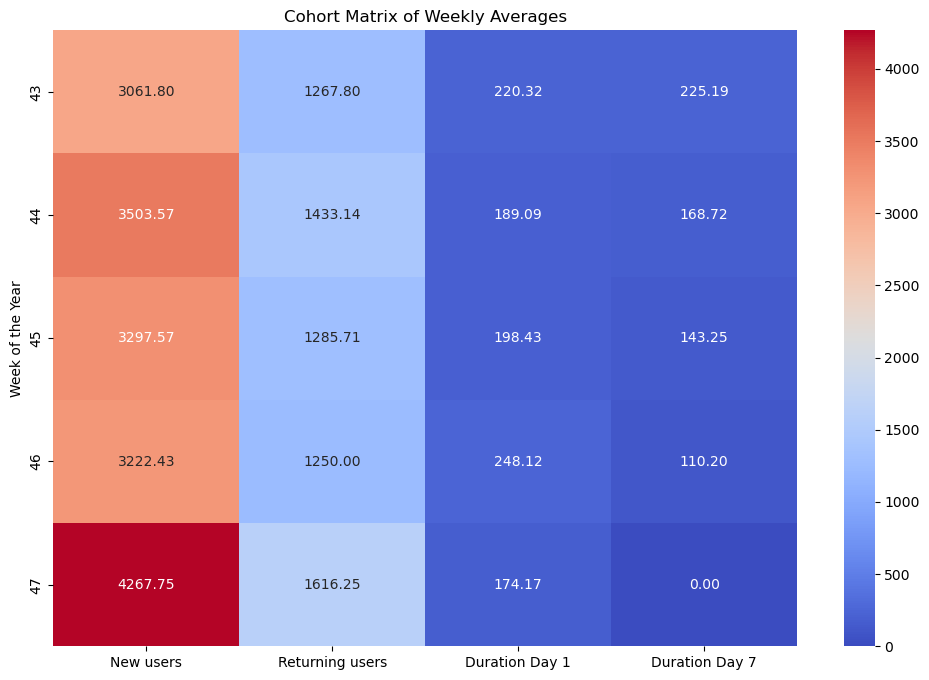

In [53]:
# creating a Cohort Matrix
cohort_matrix = weekly_averages.set_index('Week')

plt.figure(figsize = (12, 8))

sns.heatmap(cohort_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Cohort Matrix of Weekly Averages')
plt.ylabel('Week of the Year')
plt.show()

##### Summary
Cohort Analysis is a data analysis technique used to gain insights into the behaviour and characteristics of specific groups of users or customers over time. It is valuable for businesses as it allows them to understand user behaviour in a more granular and actionable way.